In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model')

In [6]:
from inltk.tokenizer import NepaliTokenizer

In [7]:
NepaliTokenizer

inltk.tokenizer.NepaliTokenizer

In [8]:
# class NepaliTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/nepali_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/nepali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [10]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '▁',
 'को',
 '।',
 ',',
 'मा',
 '▁।',
 '▁र',
 '.',
 'ले',
 'का',
 '▁छ',
 '▁हो',
 'लाई',
 '▁•',
 '▁यो',
 '▁q',
 '▁�']

In [11]:
# 15,000 is the vocab size that we chose in sentencepiece
nepali_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=NepaliTokenizer, lang='ne')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [15]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=nepali_vocab)

In [16]:
data_lm.batch_size

64

In [17]:
data_lm.save()

In [18]:
data_lm.show_batch()

idx,text
0,"▁नाच ▁हो । ▁ x x b os ▁बाल ▁विकास ▁भन्नाले ▁बालबालिका को ▁शारीरिक , ▁मानसिक , ▁सं वे ग ात्मक ▁र ▁नैतिक ▁आदि ▁पक्ष ▁आउने ▁सम्पूर्ण ▁परिमाण ात्मक ▁र ▁गुण ात्मक ▁परि बर् तन को ▁सिंग ो ▁प्रक्रिया ▁हो ▁। ▁ x x b os ▁काल ेश्वर ▁महादेव लाई ▁ललितपुर को ▁प ्याङ ▁वा सि ▁ हरू ▁आफ्ना ▁आ रा ध्य देव का ▁रूपमा ▁लिने ▁गर्दछन् । ▁त्यस्तै ,"
1,▁the <unk> ▁e p ic <unk> ▁e n co un ter <unk> at ▁ <unk> trans f or m ed ▁the <unk> ▁m id d le <unk> ▁e a st . <unk> <unk> ch ok en <unk> ok s . ▁प <unk> ▁26 0 . ▁ . ▁http s : ▁/ ▁/ ▁ book s . go o g le . es ▁/ ▁ book s ? id = n
2,▁श्री ▁राम ▁का ▁साथै ▁आ द्य ▁शक्ति ▁नव ▁दुर्गा ▁देवीको ▁पनि ▁पूजा ▁हुन्छ ▁। ▁त्रेता ▁युगमा ▁चैत्र ▁शुक्ल ▁नवमी का ▁दिन ▁अयोध्या मा ▁जन्म नु ▁भएका ▁श्रीराम ले ▁दानव ीय ▁प्रवृत्ति का ▁रावण को ▁अन्त्य ▁गरी ▁जन ▁कल्याण ▁गरिएको ▁सम्झना मा ▁यो ▁पर्व ▁मनाइन्छ ▁। ▁हिन्दू ▁धर्मावलम्बीहरू ▁रामनवमी का ▁दिन ▁बिहानै ▁नु हाइ धुवा इ ▁गरी ▁राम ▁मन्दिरमा ▁गई ▁पूजा ▁आराधना ▁गर्ने ▁गर्दछन् ▁। ▁यसै ▁क्रममा ▁राजधानी को ▁बत्ति स
3,ं त्र ▁मात्र ▁थियो ▁ x x b os ▁फ्रे ञ्च ▁ओपन ▁एउटा ▁मुख्य ▁टेनिस ▁प्रतियोगिता ▁हो ▁जुन ▁बर्षको ▁मे ▁महिना को ▁अन्त्य ▁तथा ▁जुन ▁महिना को ▁पहिलो ▁दुई ▁हप्ता भित्र ▁फ्रान्स को ▁मध्य ▁पेरिस को ▁ स्टेड ▁ रो ले न्ड ▁गार् रो स मा ▁खेल िन्छ ▁। ▁फ्रे ञ्च ▁ओपन ▁बार्षिक ▁टेनिस ▁क्यालेन्डर को ▁दोस्रो ▁ग्र ्यान्ड ▁स् ल्या म ▁र ▁संसार कै ▁प्रमुख ▁क्ले - को र्ट
4,▁बन्यो ▁र ▁सरकार ▁ पनी ▁माओवादी को ▁बन्यो । सो ▁सरकारका ▁तत्कालीन ▁अर्थमन्त्री ▁बाबुराम ▁भट्टराई ▁र ▁नागरिक ▁उड्डयन ▁तथा ▁पर्यटन ▁मन्त्री ▁हि सिला ▁यम ी ▁द्वारा ▁औ प चार ीक ▁रुपमा ▁यसको ▁उद्घाटन ▁गरियो । त त् पश्चात् ▁यस ▁क्षेत्रको ▁स्थानीय ▁एवं ▁जिल्लाबाट ▁संरक्षण ▁एवं ▁प्र र्व द्व न ▁गर्ने ▁कार्य ▁हुदै ▁आइरहेको ▁छ । वि भिन्न ▁समयमा ▁यहाँ ▁महोत्सव को ▁आयोजना ▁हुदै ▁आइरहे का ▁छन । जू न ▁विशेषगरी


In [19]:
len(data_lm.vocab.itos)

15000

In [20]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [21]:
gc.collect()

20

In [22]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(15000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


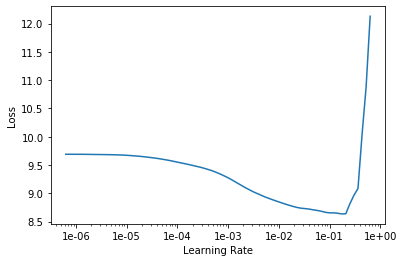

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.236090,6.203444,0.177704,08:22
1,5.582477,5.552870,0.218830,08:21
2,5.096238,5.139091,0.242624,08:21
3,4.822802,4.806278,0.265919,08:21
4,4.560954,4.614542,0.280274,08:21
5,4.426813,4.466482,0.291230,08:21
6,4.279871,4.337081,0.302837,08:21
7,4.124228,4.226497,0.312392,08:22
8,4.077218,4.121408,0.322632,08:22
9,3.898239,4.022962,0.334289,08:23


Better model found at epoch 0 with accuracy value: 0.1777041107416153.
Better model found at epoch 1 with accuracy value: 0.21883007884025574.
Better model found at epoch 2 with accuracy value: 0.24262377619743347.
Better model found at epoch 3 with accuracy value: 0.26591935753822327.
Better model found at epoch 4 with accuracy value: 0.2802739441394806.
Better model found at epoch 5 with accuracy value: 0.2912299931049347.
Better model found at epoch 6 with accuracy value: 0.3028365671634674.
Better model found at epoch 7 with accuracy value: 0.3123922646045685.
Better model found at epoch 8 with accuracy value: 0.3226315975189209.
Better model found at epoch 9 with accuracy value: 0.3342888057231903.
Better model found at epoch 10 with accuracy value: 0.3462657034397125.
Better model found at epoch 11 with accuracy value: 0.360690176486969.
Better model found at epoch 12 with accuracy value: 0.37555167078971863.
Better model found at epoch 13 with accuracy value: 0.3886428773403168.

In [26]:
TEXT = "अन्तर्राष्ट्रिय खेलमा राष्ट्रिय "
N_WORDS = 40
N_SENTENCES = 2

In [27]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁फुटबल ▁टिम ▁अन्तर्राष्ट्रिय ▁फुटबल ▁प्रतियोगिताहरू मा ▁अन्तर्राष्ट्रिय ▁फुटबल ▁प्रतियोगिताहरू मा ▁अन्तर्राष्ट्रिय ▁फुटबल ▁प्रतियोगिताहरू मा ▁अन्तर्राष्ट्रिय ▁फुटबल ▁प्रतियोगितामा ▁अन्तर्राष्ट्रिय ▁फुटबल को ▁लागि ▁शासकीय ▁निकाय ▁अन्तर्राष्ट्रिय ▁फुटबल ▁संघको ▁नियन्त्रणमा ▁रहेको े ▁छ ▁। ▁यो ▁फिफा ▁ द्वरा ▁मान्यता ▁प्रप्त ▁र ▁एएफसी को
अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁स्तर को ▁फुटबल ▁खेल ▁खेलाडीहरू को ▁योगदान को ▁लागि ▁प्रयोग ▁हुने ▁खेल ▁हो । ▁सन् ▁1995 मा ▁अन्तर्राष्ट्रिय ▁स्तर को ▁फुटबल ▁प्रतियोगिता ▁पहिलो ▁पटक ▁आयोजना ▁भएको ▁थियो ▁भने ▁सन् ▁2005 मा ▁अन्तर्राष्ट्रिय ▁स्तर को ▁फुटबल ▁प्रतियोगितामा ▁भाग ▁लिएका ▁थिए ।


In [28]:
np.exp(3.378801)

29.335576662014443

In [29]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [30]:
# Generating embedding vectors for visualization

In [31]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model')

In [13]:
# defaults.device = torch.device('cpu')

In [14]:
# learn = load_learner(path / 'NepaliDataset/')

In [32]:
encoder = get_model(learn.model)[0]

In [33]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([15000, 410])

In [34]:
embeddings = encoder.state_dict()['encoder.weight']

In [35]:
embeddings = np.array(embeddings)

In [36]:
embeddings[0].shape

(410,)

In [37]:
df = pd.DataFrame(embeddings)

In [38]:
df.shape

(15000, 410)

In [39]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,0.160747,0.076773,0.149212,-0.138141,0.302149,0.019053,-0.023964,0.278636,0.156217,0.006057,...,0.121411,0.155847,0.085004,0.262969,0.099392,0.457963,0.117635,0.297306,-0.026049,-0.013435
1,0.124747,-0.169017,-0.162681,-0.283808,-0.272176,-0.176874,0.213243,-0.160942,-0.131333,-0.487269,...,-0.032140,0.330343,-0.353373,0.079498,-0.240863,-0.188980,0.074720,0.041163,-0.169618,-0.182355
2,0.130035,-0.161746,-0.159999,-0.284987,-0.272495,-0.176450,0.219518,-0.164201,-0.139630,-0.477791,...,-0.025642,0.330252,-0.373162,0.081284,-0.247350,-0.179109,0.076438,0.036812,-0.172079,-0.166253
3,0.125885,0.135601,-0.019326,0.153458,-0.080039,0.083314,-0.293421,0.276295,0.021222,0.216001,...,0.211338,-0.310424,0.245695,0.248740,0.244034,0.444554,0.012390,0.041892,-0.132476,-0.174954
4,0.123520,0.245146,0.137474,0.235598,0.140397,0.287948,-0.117437,0.239361,0.037772,-0.014582,...,-0.100402,-0.487872,0.246989,-0.446680,-0.246674,-0.490044,0.206700,-0.270419,-0.147116,-0.161871


In [41]:
df2 = pd.DataFrame(itos)

In [42]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁
4,को


In [43]:
df2.shape

(15000, 1)

In [44]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [45]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 0.1247, -0.1690, -0.1627, -0.2838, -0.2722, -0.1769,  0.2132, -0.1609,
        -0.1313, -0.4873,  0.0933,  0.2504, -0.1186,  0.3931,  0.1213, -0.3692,
         0.0870, -0.3274,  0.2699, -0.2437,  0.0111,  0.4535,  0.2668,  0.0661,
         0.3557, -0.4491,  0.0940,  0.2342, -0.0936, -0.2848,  0.0331, -0.0707,
         0.0324, -0.1482,  0.0281,  0.0329,  0.1116, -0.0603,  0.2789, -0.1795,
         0.0362, -0.0211,  0.2475, -0.2763, -0.0959, -0.0447,  0.3523, -0.1490,
         0.1639, -0.0294,  0.0555, -0.0330,  0.1610, -0.2055,  0.3066, -0.0114,
         0.1892,  0.4933,  0.1868,  0.0109,  0.1630,  0.2928, -0.3037, -0.1148,
         0.1884,  0.0681,  0.1940, -0.1562,  0.0480, -0.4323, -0.0371,  0.0455,
         0.0631,  0.0229, -0.0659, -0.1054,  0.1637, -0.2935,  0.2553, -0.0453,
         0.4218, -0.1516,  0.2000, -0.0105, -0.4283,  0.0756,  0.4329,  0.2228,
         0.0705, -0.0233,  0.0633, -0.2401, -0.2446,  0.0722,  0.0554,  0.1877,
         0.1738,  0.1369, -0.1079, -0.38